## Import'ы

In [157]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE


### Загрузка данных

In [158]:
boston = load_boston()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [159]:
df_boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston_Y = pd.DataFrame(boston.target, columns = ["Y_price"])


In [164]:
df_boston_X.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1      

In [160]:
df_boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [161]:
df_boston_Y.head()

,Y_price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [169]:
x_train, x_test, y_train, y_test = train_test_split(df_boston_X, df_boston_Y, test_size=0.2, random_state=42)

In [170]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [171]:
y_train

,Y_price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


#### Стандартизируем данные с графиками

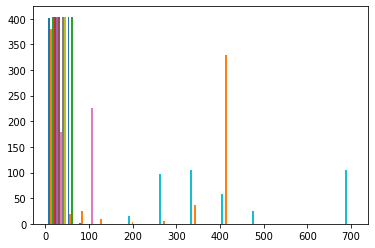

In [172]:
plt.hist(x_train)
plt.show()

In [173]:
st_scaler = StandardScaler()
x_train_fitted = st_scaler.fit_transform(x_train)
df_x_train_fitted = pd.DataFrame(x_train_fitted, columns=x_train.columns)


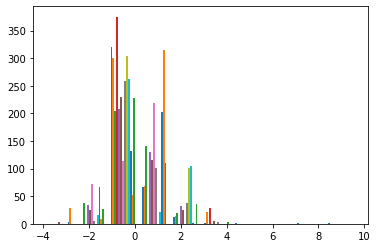

In [174]:
plt.hist(df_x_train_fitted)
plt.show()

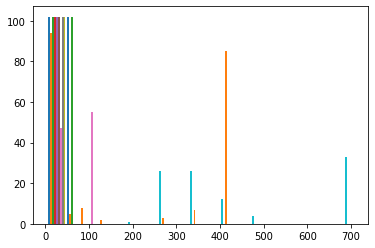

In [175]:
plt.hist(x_test)
plt.show()


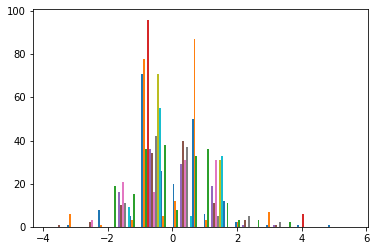

In [176]:
x_test_fitted = st_scaler.fit_transform(x_test)
plt.hist(x_test_fitted)
plt.show()

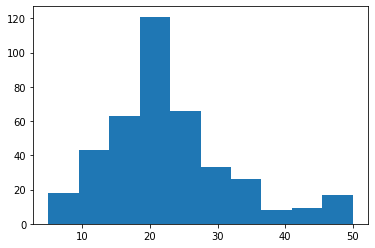

In [177]:
plt.hist(y_train)
plt.show()

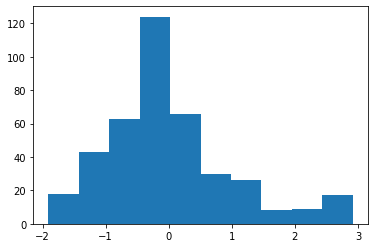

In [178]:

y_train_fitted = st_scaler.fit_transform(y_train)
plt.hist(y_train_fitted)
plt.show()

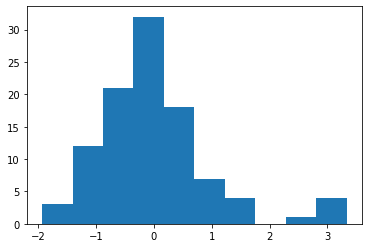

In [74]:
y_test_fitted = st_scaler.fit_transform(y_test)
plt.hist(y_test_fitted)
plt.show()

### Используем t-SNE и смотрим что получится

In [179]:
tsne_obj = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne_obj.fit_transform(x_train_fitted)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [180]:
x_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

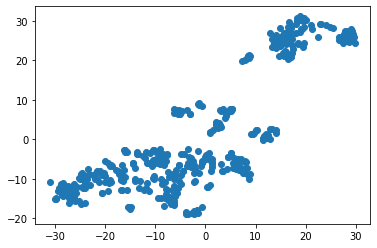

In [181]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1])
plt.show()



### Используем KMeans

In [182]:
kmeans_boston = KMeans(n_clusters=3)

In [208]:
labels_train = kmeans_boston.fit_predict(x_train_fitted)

In [209]:
pd.value_counts(labels_train)

2    190
1    128
0     86
dtype: int64

In [210]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

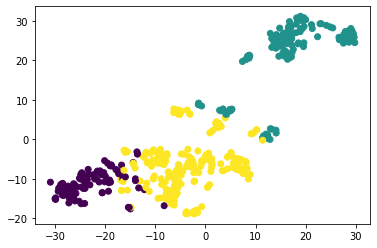

In [211]:
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1], c=labels_train)
plt.show()

In [212]:
x_train["labels_train"] = labels_train

In [213]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,labels_train
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,2
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,2
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,2
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,0
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,1


In [214]:
df_train_finish = x_train.copy()
df_train_finish["Price"] = y_train["Y_price"]


In [216]:
df_train_finish.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,labels_train,Price
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,2,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.26363,0.0,8.56,0.0,0.5200,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55,2,19.4
420,11.08740,0.0,18.10,0.0,0.7180,6.411,100.0,1.8589,24.0,666.0,20.2,318.75,15.02,1,16.7
145,2.37934,0.0,19.58,0.0,0.8710,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,1,13.8
92,0.04203,28.0,15.04,0.0,0.4640,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,2,22.9


In [224]:
y_train.shape, df_train_finish.shape


((404, 1), (404, 15))

### Вычисляем средние значения Price, CRIM в разных кластерах

In [230]:
mean_0 = df_train_finish[labels_train == 0].mean()
mean_0["Price"], mean_0["CRIM"]


(27.78837209302326, 0.07356558139534884)

In [231]:
mean_1 = df_train_finish[labels_train == 1].mean()
mean_1["Price"], mean_1["CRIM"]


(16.1796875, 10.7152190625)

In [232]:
mean_2 = df_train_finish[labels_train == 2].mean()
mean_2["Price"], mean_2["CRIM"]


(24.99473684210526, 0.42216668421052633)